In [1]:
 %config Completer.use_jedi = False

In [26]:
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars
import numpy as np
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt
import kf_book.gh_internal as gh

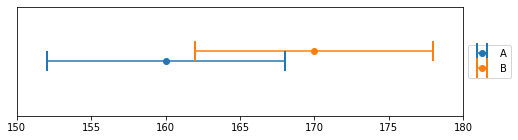

In [7]:
plot_errorbars([(160, 8, "A"), (170, 8, "B")], xlims = (150, 180))

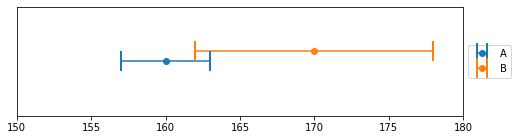

In [8]:
plot_errorbars([(160, 3, "A"), (170, 8, "B")], xlims = (150, 180))

In [11]:
measurements = np.random.uniform(160, 170, size=10000)
mean = measurements.mean()
print("Average of measurements is {:.4f}".format(mean))

Average of measurements is 164.9937


In [13]:
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
time_step = 1.0
scale_factor = 4.0/10

In [22]:
def predict_using_gain_guess(estimated_weight, gain_rate, do_print=True):
    estimates, predictions = [estimated_weight], []
    for z in weights:
        # predict new position
        predicted_weight = estimated_weight + gain_rate * time_step
        
        # update filter
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)
        
        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            print(f"Previous etiamte: {estimates[-2]:.2f}, predictions: {predicted_weight:.2f}, estiamtes: {estimated_weight:.2f}")
    return estimates, predictions

In [24]:
initial_estimates = 160.
estimates, predictions = predict_using_gain_guess(initial_estimates, 1)


Previous etiamte: 160.00, predictions: 161.00, estiamtes: 159.80
Previous etiamte: 159.80, predictions: 160.80, estiamtes: 162.16
Previous etiamte: 162.16, predictions: 163.16, estiamtes: 162.02
Previous etiamte: 162.02, predictions: 163.02, estiamtes: 161.77
Previous etiamte: 161.77, predictions: 162.77, estiamtes: 162.50
Previous etiamte: 162.50, predictions: 163.50, estiamtes: 163.94
Previous etiamte: 163.94, predictions: 164.94, estiamtes: 166.80
Previous etiamte: 166.80, predictions: 167.80, estiamtes: 167.64
Previous etiamte: 167.64, predictions: 168.64, estiamtes: 167.75
Previous etiamte: 167.75, predictions: 168.75, estiamtes: 169.65
Previous etiamte: 169.65, predictions: 170.65, estiamtes: 170.87
Previous etiamte: 170.87, predictions: 171.87, estiamtes: 172.16


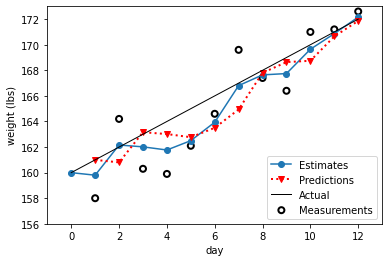

In [27]:
gh.plot_gh_results(weights, estimates, predictions, [160, 172])

In [29]:
def predict_using_gain_guess_1(estimated_weight, gain_rate, gain_scale, do_print=True):
    estimates, predictions = [estimated_weight], []
    for z in weights:
        # predict new position
        predictions = estimated_weight + gain_rate * time_step
        gain_rate = gain_rate
        predictions.append(weight)
        
        # update
        residual = z - weight
        gain_rate = gain_rate  + gain_scale * (residual/time_step)
        
        estimated_weight = weight + weight_scale * residual
        estimates.append(estimated_weight)
        
        # save and log
        predictions.append(predicted_weight)
        if do_print:
            print(f"Previous etiamte: {estimates[-2]:.2f}, predictions: {predicted_weight:.2f}, estiamtes: {estimated_weight:.2f}")
    return estimates, predictions

In [30]:
initial_estimates = 160.
estimates, predictions = predict_using_gain_guess(initial_estimates, 1, 1./3)


Previous etiamte: 160.00, predictions: 161.00, estiamtes: 159.80
Previous etiamte: 159.80, predictions: 160.80, estiamtes: 162.16
Previous etiamte: 162.16, predictions: 163.16, estiamtes: 162.02
Previous etiamte: 162.02, predictions: 163.02, estiamtes: 161.77
Previous etiamte: 161.77, predictions: 162.77, estiamtes: 162.50
Previous etiamte: 162.50, predictions: 163.50, estiamtes: 163.94
Previous etiamte: 163.94, predictions: 164.94, estiamtes: 166.80
Previous etiamte: 166.80, predictions: 167.80, estiamtes: 167.64
Previous etiamte: 167.64, predictions: 168.64, estiamtes: 167.75
Previous etiamte: 167.75, predictions: 168.75, estiamtes: 169.65
Previous etiamte: 169.65, predictions: 170.65, estiamtes: 170.87
Previous etiamte: 170.87, predictions: 171.87, estiamtes: 172.16


# G-H Filter 

**Initialization**
1. initialize the state of the filter
2. initialize our belief in the state

**Predict**
1. Use system behavior to predict state of the next time step
2. Adjust belief to acount for the uncertainty in prediction

**Update**
1. Get a measurement and associated belief about its accuracy
2. Compute residual between estimated state and measruement
3. New estiamtes is somewhere on the residual line


`g` is weight scale, `h` is gain scale 
A bigger `g` indicates we more trust the sensor data
`h` controls the convergence speed, it indicates how much we favour the measurement of changing speed vs our predictions

In [34]:
def gh_Filter(datas, x0, dx, g, h, dt, is_print=False):
    x_est = x0
    result = []
    for data in datas:
        # Prediction
        x_pred = x_est + dx * dt
        
        # Update
        residual = data - x_pred
        dx = dx + h * residual/dt
        
        x_est = x_pred + residual * g
        result.append(x_est)
        if is_print:
            print(x_est)
    return result